# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [16]:
import numpy
import matplotlib.pyplot as plt

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/astronaut.png` and show it:

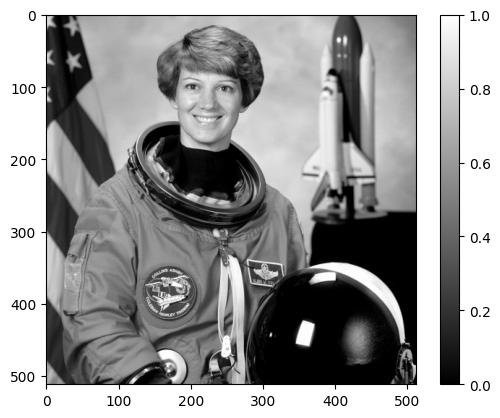

In [17]:
img = plt.imread('data/astronaut.png')
plt.imshow(img, 'gray')
plt.colorbar()

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical 3&times;3 Prewitt filters:

In [36]:
def prewitt_h(img):
    result = numpy.zeros(img.shape)
    n = (3 - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        if p[0]-n >= 0 and p[1]-n >= 0 and p[0]+n < img.shape[0] and p[1]+n < img.shape[1]:
            for q in numpy.ndindex(3, 3):
                if q[1] == 0:  # q == (0,0) or q == (1,0) or q == (2,0)
                    neighborhood_sum = neighborhood_sum + ((-1/6)*img[p[0]-n+q[0],p[1]-n+q[1]])  
                elif q[1] == 2:   #q == (0,2) or q == (1,2) or q == (2,2)
                    neighborhood_sum = neighborhood_sum + ((1/6)*img[p[0]-n+q[0],p[1]-n+q[1]])
            result[p] = neighborhood_sum 
    return result
    
def prewitt_v(img):
    result = numpy.zeros(img.shape)
    n = (3 - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        if p[0]-n >= 0 and p[1]-n >= 0 and p[0]+n < img.shape[0] and p[1]+n < img.shape[1]:
            for q in numpy.ndindex(3, 3):
                if q[0] == 0: #q == (0,0) or q == (0,1) or q == (0,2)
                    neighborhood_sum = neighborhood_sum + ((-1/6)*img[p[0]-n+q[0],p[1]-n+q[1]])
                elif q[0] == 2: #q == (2,0) or q == (2,1) or q == (2,2)
                    neighborhood_sum = neighborhood_sum + ((1/6)*img[p[0]-n+q[0],p[1]-n+q[1]]) 
            result[p] = neighborhood_sum 
    return result

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

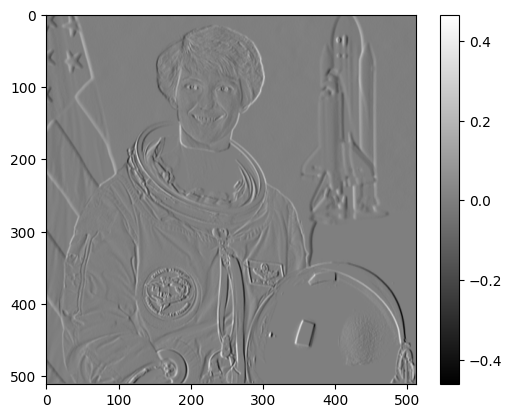

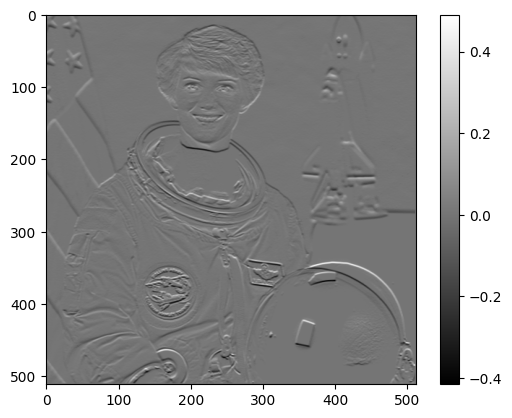

In [37]:
plt.figure()
prewitt_h_img = prewitt_h(img)
plt.imshow(prewitt_h_img,'gray')
plt.colorbar()

plt.figure()
prewitt_v_img = prewitt_v(img)
plt.imshow(prewitt_v_img,'gray')
plt.colorbar()

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/astronaut_prewitt_h.tiff` and `data/astronaut_prewitt_v.tiff`:

In [38]:
import skimage.io
img_dat_prewitt_h = skimage.io.imread('data/astronaut_prewitt_h.tiff')
assert numpy.allclose(prewitt_h_img, img_dat_prewitt_h, atol=1/255)

img_dat_prewitt_v = skimage.io.imread('data/astronaut_prewitt_v.tiff')
assert numpy.allclose(prewitt_v_img, img_dat_prewitt_v, atol=1/255)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

In [43]:
gradient_maginitude = numpy.sqrt((prewitt_h_img*prewitt_h_img) + (prewitt_v_img*prewitt_v_img))

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/astronaut_prewitt_gradmag.tiff`:

In [45]:
dat_gradmag = skimage.io.imread('data/astronaut_prewitt_gradmag.tiff')
assert numpy.allclose(gradient_maginitude, dat_gradmag, atol=1/255)

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical 3&times;3 Sobel filtering, respectively:

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/astronaut_sobel_h.tiff` and `data/astronaut_sobel_v.tiff`: